In [785]:
#importa las librerias necesarias
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from src import soporte_limpieza as sl
from src import soporte_eda as se

In [786]:
#configura para poder visualizar todas las columnas del dataframe
pd.set_option("display.max_columns", None)

In [787]:
#lee el pickle que contiene el df final 
df = pd.read_pickle("datos/datos-final-mejorado.pkl")
df.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício
0,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,2013
1,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Recuperacao de despesas de exerc. anteriores,0.0,0.0,26666621.42,0.0,2013-12-31,2013
2,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Multas administrativas, contratuais e judicia",Outras multas e juros de mora,0.0,0.0,301251.13,0.0,2013-12-31,2013
3,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.div.ativa por infração administrativa,0.0,0.0,1855.58,0.0,2013-12-31,2013
4,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Outras restituicoes,0.0,0.0,52140.68,0.0,2013-12-31,2013


### Análisis de ingresos recaudados

Para empezar, quiero conocer el total de ingresos recaudados entre 2013 y 2021

In [788]:
#calcula el total de los ingresos para todos los años
total_ingresos = df["Valor_realizado"].sum()
total_ingresos

np.float64(25637382435446.004)

De 2013 a 2021 el gobierno de Brasil recaudó 25.637.382.435.446 BRL

Voy a observar ahora año a año como fue esta recaudación para poder detectar diferencias en la recaudación entre periodos anuales. Lo primero que voy a hacer es crear un dataframe donde voy a tener los años agrupados y para cada año voy a tener por un lado los ingresos totales recaudados en ese año, y por otro lado, el % de esos ingresos sobre el total de la recaudación para todos los años. Con % considero que se ve mejor

In [789]:
#genera el dataframe para la primera visualizacion (recaudacion de ingresos año a año)
df_ingresos_año = df.groupby("Ano_exercício")["Valor_realizado"].sum()
df_ingresos_año = df_ingresos_año.reset_index()
df_ingresos_año["%/Total"] = round((df_ingresos_año["Valor_realizado"] / total_ingresos)*100,2)
df_ingresos_año

,Ano_exercício,Valor_realizado,%/Total
0,2013,1.893614e+12,7.39
1,2014,2.238551e+12,8.73
2,2015,2.665685e+12,10.40
3,2016,2.839712e+12,11.08
4,2017,2.558047e+12,9.98
5,2018,2.942388e+12,11.48
6,2019,2.991565e+12,11.67
7,2020,3.631449e+12,14.16
8,2021,3.876372e+12,15.12


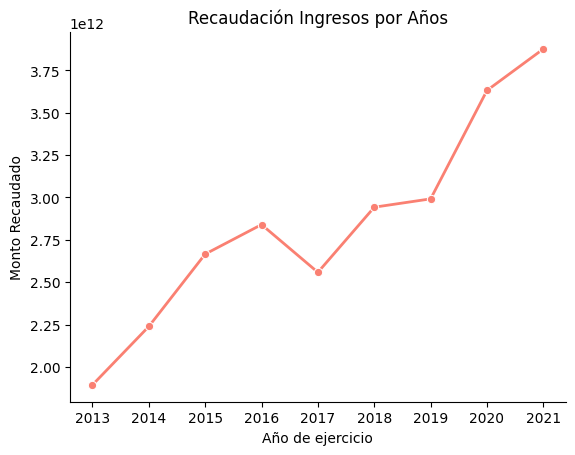

In [790]:
#genera la primera visualizacion (recaudacion ingresos año a año)
sns.lineplot(x = df_ingresos_año["Ano_exercício"],
              y = df_ingresos_año["Valor_realizado"], 
               marker = "o", 
                linewidth = 2, 
                color="salmon", 
                errorbar = None)

plt.title("Recaudación Ingresos por Años")
plt.xlabel("Año de ejercicio")
plt.ylabel("Monto Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Parece que la recaudación de los ingresos siguen de forma general una tendencia alcista con el paso de los años entre 2013 y 2021. De 2013 a 2016 la recaudación en los ingresos aumenta año a año. Se pasa de 1,89 billones de BRL (que suponen un 7,39% sobre la recaudación total entre 2013 y 2021) en 2013 a 2,83 billones (11,08%) en 2016. Sin embargo, en 2017, es el único año donde se observa un descenso en la recaudación, pues el % sobre la recaudación total cae a un 9,98%. A partir de este año y hasta 2021, los ingresos continúan aumentando hasta obtener en 2021 un % de 15,12% (3,87 billones). En total, con los años, el aumento en el porcentaje ha sido de un 8% aprox

Una vez observado como han evolucionado los ingresos recaudados por el gobierno de Brasil a lo largo de los años, me gustaría observarlo también a lo largo de los meses (de forma general, para todos los años). Voy a generar un dataframe igual que el de los años, pero esta vez agrupando por mes. Para ello, lo primero que necesito es disponer de una columna en mi dataframe original donde disponga de únicamente el mes, ya que en la columna de fecha de registro dispongo del día, mes, y año

In [791]:
#crea la columna de mes_registro 
df["Mes_registro"] = df["Data_lançamento"].dt.month
df.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
0,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,2013,12.0
1,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Recuperacao de despesas de exerc. anteriores,0.0,0.0,26666621.42,0.0,2013-12-31,2013,12.0
2,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Multas administrativas, contratuais e judicia",Outras multas e juros de mora,0.0,0.0,301251.13,0.0,2013-12-31,2013,12.0
3,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.div.ativa por infração administrativa,0.0,0.0,1855.58,0.0,2013-12-31,2013,12.0
4,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Outras restituicoes,0.0,0.0,52140.68,0.0,2013-12-31,2013,12.0


In [792]:
#genera el dataframe para la segunda visualizacion (recaudacion de ingresos mes a mes)
df_ingresos_mes = df.groupby("Mes_registro")["Valor_realizado"].mean()
df_ingresos_mes = df_ingresos_mes.reset_index()
df_ingresos_mes["%/Total"] = round((df_ingresos_mes["Valor_realizado"] / df_ingresos_mes["Valor_realizado"].sum())*100,2)
df_ingresos_mes

,Mes_registro,Valor_realizado,%/Total
0,1.0,2.073355e+07,6.86
1,2.0,1.509530e+07,5.00
2,3.0,1.849139e+07,6.12
3,4.0,1.906940e+07,6.31
4,5.0,1.484075e+07,4.91
5,6.0,1.485984e+07,4.92
6,7.0,1.930557e+07,6.39
7,8.0,1.932318e+07,6.39
8,9.0,2.277911e+07,7.54
9,10.0,2.011470e+07,6.66


In [793]:
#saca los valores unicos de la columna Mes_registro
df_ingresos_mes["Mes_registro"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

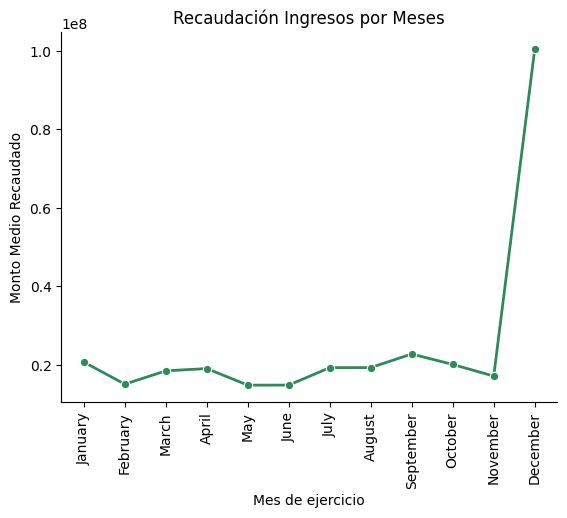

In [794]:
#genera la segunda visualizacion (recaudacion ingresos mes a mes)
sns.lineplot(x = df_ingresos_mes["Mes_registro"],
              y = df_ingresos_mes["Valor_realizado"], 
               marker = "o", 
                linewidth = 2, 
                color="seagreen", 
                errorbar = None)

plt.title("Recaudación Ingresos por Meses")
plt.xlabel("Mes de ejercicio")
plt.ylabel("Monto Medio Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(ticks=df_ingresos_mes["Mes_registro"].unique(), labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=90);

En este gráfico se observa algo que ya venía esperando, pues he de recordar que en el análisis exploratorio ya había observado que algo raro ocurría con la fecha de registro en los 3 primeros años, pues esta era siempre la misma (31 de diciembre). Es por ello por lo que parece de primeras que diciembre es el mes en el que más se recauda con diferencia, pero en realidad esto no es así. Voy a hacer el gráfico de nuevas omitiendo los años de 2013, 2014 y 2015, de forma que los datos ya sean más realistas

In [795]:
#crea un dataframe a partir del original con todos los años excepto el 2013, 2014 y 2015
df_sin_tres_primeros_años = df[(df["Ano_exercício"] != 2013) & (df["Ano_exercício"] != 2014) & (df["Ano_exercício"] != 2015)]
df_sin_tres_primeros_años.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
13574,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Encargos legais pela inscr.em div.ativa-princ,0.0,0.0,154948.98,0.0,2016-04-04,2016,4.0
13575,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Onus de sucumbencia-multas e juros,0.0,0.0,80.84,0.0,2016-12-08,2016,12.0
13576,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Outras receitas-primarias-principal,0.0,0.0,4996.11,0.0,2016-08-22,2016,8.0
13577,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,"Impostos, taxas e contribuições de melhoria",Taxas,Taxa de controle e fisc.ambiental-mul.jur.,0.0,0.0,0.77,0.0,2016-03-21,2016,3.0
13578,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Onus de sucumbencia-multas e juros,0.0,0.0,23.45,0.0,2016-11-04,2016,11.0


In [796]:
#genera el dataframe para la segunda visualizacion (recaudacion de ingresos mes a mes) sin los 3 primeros años
df_ingresos_mes_correcto = df_sin_tres_primeros_años.groupby("Mes_registro")["Valor_realizado"].mean()
df_ingresos_mes_correcto = df_ingresos_mes_correcto.reset_index()
df_ingresos_mes_correcto["%/Total"] = round((df_ingresos_mes_correcto["Valor_realizado"] / df_ingresos_mes_correcto["Valor_realizado"].sum())*100,2)
df_ingresos_mes_correcto

,Mes_registro,Valor_realizado,%/Total
0,1.0,2.073355e+07,9.27
1,2.0,1.509530e+07,6.75
2,3.0,1.849139e+07,8.27
3,4.0,1.906940e+07,8.53
4,5.0,1.484075e+07,6.64
5,6.0,1.485984e+07,6.65
6,7.0,1.930557e+07,8.64
7,8.0,1.932318e+07,8.64
8,9.0,2.277911e+07,10.19
9,10.0,2.011470e+07,9.00


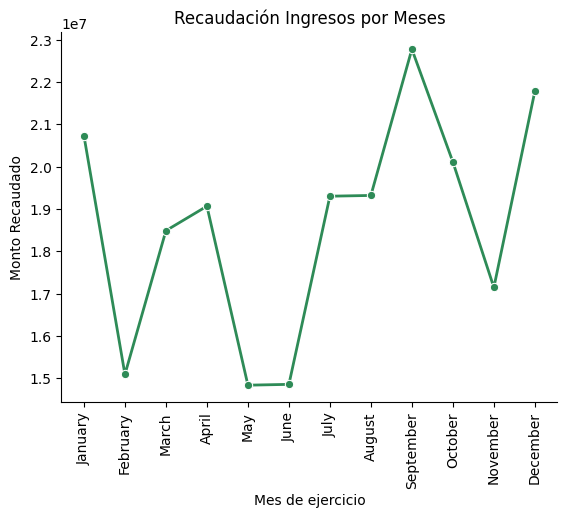

In [797]:
#genera la segunda visualizacion (recaudacion ingresos mes a mes) sin los 3 primeros años
sns.lineplot(x = df_ingresos_mes_correcto["Mes_registro"],
              y = df_ingresos_mes_correcto["Valor_realizado"], 
               marker = "o", 
                linewidth = 2, 
                color="seagreen", 
                errorbar = None)

plt.title("Recaudación Ingresos por Meses")
plt.xlabel("Mes de ejercicio")
plt.ylabel("Monto Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(ticks=df_ingresos_mes_correcto["Mes_registro"].unique(), labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=90);

Ahora si podemos llegar a unos resultados más realistas. En el caso de los meses, se observa bastante más fluctuación que en el caso de los años. En los meses el monto flúctua entre 15 y 23 millones BRL aprox. Parece que con el paso de los meses la recaudación no sigue una tendencia clara. Septiembre parece que es en media el mes en el que más se recauda seguido de diciembre. En septiembre se recauda en media 22,7 millones (lo que supone un 10,19% de la recaudación total media de un año). En diciembre se recauda 21,7 millones (9,74%). Por el contrario, febrero, mayo y junio parecen ser los meses de menor recaudación. En febrero se recaudan 15 millones (6,75%), en mayo 14,8 (6,64%) y en junio 14,8 (6,65%). Hay grandes fluctuaciones entre los meses y parece que la mayor está entre enero y febrero. El año comienza bastante bien en enero alcanzando una recaudación de 20,7 millones (el 9,27% de la recaudación total anual) pero en febrero la recaudación cae bastante (cae algo más de cinco millones). Sin embargo, a pesar de que las fluctuaciones entre meses sean evidentes, la recaudación entre meses no es demasiado significativa, pues el rango entre el que se mueve el monto recaudado no es demasiado amplio. Es decir, no hay un mes en el que se concentre mayoritariamente la recaudación. Está bastante distribuida

Tras este primer análisis temporal, me gustaría comprobar si lo visto en la exploración de los datos en relación con el % de racaudación en términos de frecuencia por las categorías económicas y por los órganos superiores también se cumple en términos monetarios. Voy a hacer primero un análisis de ingresos recaudados (para todos los años) por categorías económicas y luego por órganos superiores

In [798]:
#genera el dataframe para la tercera visualizacion (recaudacion de ingresos por categoria economica)
df_ingresos_categoria = df.groupby("Categoria_econômica")["Valor_realizado"].sum()
df_ingresos_categoria = df_ingresos_categoria.reset_index()
df_ingresos_categoria["%/Total"] = round((df_ingresos_categoria["Valor_realizado"] / total_ingresos)*100,2)
df_ingresos_categoria = df_ingresos_categoria.drop([4], axis=0)
df_ingresos_categoria =df_ingresos_categoria.sort_values(by="%/Total", ascending=False)
df_ingresos_categoria

,Categoria_econômica,Valor_realizado,%/Total
0,Receitas correntes,1.290934e+13,50.35
2,Receitas de capital,1.240714e+13,48.39
1,Receitas correntes - intra-orçamentárias,2.926518e+11,1.14
3,Receitas de capital - intra-orçamentárias,2.825084e+10,0.11


He ordenado las filas de este dataframe por los valores del %/Total para cuando haga la visualización que queden las gráficas colocadas de mayor a menor. Por otro lado, he eliminado la fila que contenía la categoría "Sin información" ya que tenía un % sobre el total del 0%, por lo que no aporta nada de valor en el análisis esta categoría más que tener en cuenta que no se recauda nada con ella

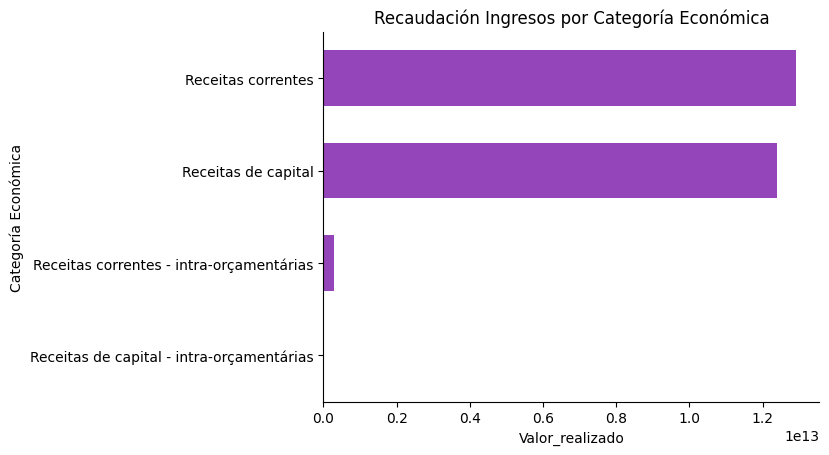

In [799]:
#genera la tercera visualizacion (recaudacion ingresos por categoria economica)
ax = sns.barplot(x="Valor_realizado", 
            y="Categoria_econômica",
            data=df_ingresos_categoria,
            color="darkorchid",
            width=0.6
            ) 

plt.title("Recaudación Ingresos por Categoría Económica")
plt.ylabel("Categoría Económica")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

En el análisis exploratorio, los Ingresos Corrientes parecía que se llevaban casi toda la recaudación, pues esta categoría aparecía en un 95,45% de los registros. Los ingresos de capital únicamente aparecían en el 2,93%. Sin embargo, a través de este gráfico lo que se puede observar y concluir es que aunque los Ingresos Corrientes sean la categoría económica de la que más veces se ha recaudado entre 2013 y 2021, en términos monetarios está bastante igualada a la de Ingresos de Capital. Es decir, de Ingresos Corrientes se recauda con mucha frecuencia pero en cantidades de dinero pequeñas y de Ingresos de Capital se recauda con mucha menor frecuencia pero en cantidades de dinero muy grandes. De Ingresos Corrientes se han recaudado 12,9 billones entre 2013 y 2021, lo que supone el 50,35% de la recaudación total en estos años y de Ingresos de Capital 12,4 billones, un 48,39% sobre la recaudación total. Estas dos categorías son las que claramente se llevan el monto de la recaudación. De Ingresos corrientes - intra-presupuestarios se recauda el 1,14% y por último, de Ingresos de capital - intra-presupuestarios el 0,11%, es decir, prácticamente nada

Ahora me interesa observar estas diferencias en la recaduación por categorías económicas (concretamente, por la de Ingresos Corrientes e Ingresos de Capital ya que he visto que entre estas dos se recauda prácticamente el 99% de los ingresos) por años también

In [800]:
#se queda con los registros cuya categoria economica es o ingresos corrientes o ingresos de capital
categorias = ["Receitas correntes", "Receitas de capital"]
df_categorias_principales = df[df["Categoria_econômica"].isin(categorias)]
df_categorias_principales.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
0,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,2013,12.0
1,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Recuperacao de despesas de exerc. anteriores,0.0,0.0,26666621.42,0.0,2013-12-31,2013,12.0
2,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Multas administrativas, contratuais e judicia",Outras multas e juros de mora,0.0,0.0,301251.13,0.0,2013-12-31,2013,12.0
3,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.div.ativa por infração administrativa,0.0,0.0,1855.58,0.0,2013-12-31,2013,12.0
4,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Outras restituicoes,0.0,0.0,52140.68,0.0,2013-12-31,2013,12.0


In [801]:
#genera el dataframe para la cuarta visualizacion (recaudacion de ingresos por categoria economica y años)
df_ingresos_año_categoria = df_categorias_principales.groupby(["Ano_exercício", "Categoria_econômica"])["Valor_realizado"].sum()
df_ingresos_año_categoria = df_ingresos_año_categoria.reset_index()
df_ingresos_año_categoria

,Ano_exercício,Categoria_econômica,Valor_realizado
0,2013,Receitas correntes,1.224575e+12
1,2013,Receitas de capital,6.423447e+11
2,2014,Receitas correntes,1.247919e+12
3,2014,Receitas de capital,9.521063e+11
4,2015,Receitas correntes,1.285850e+12
5,2015,Receitas de capital,1.332216e+12
6,2016,Receitas correntes,1.362795e+12
7,2016,Receitas de capital,1.434742e+12
8,2017,Receitas correntes,1.397356e+12
9,2017,Receitas de capital,1.119288e+12


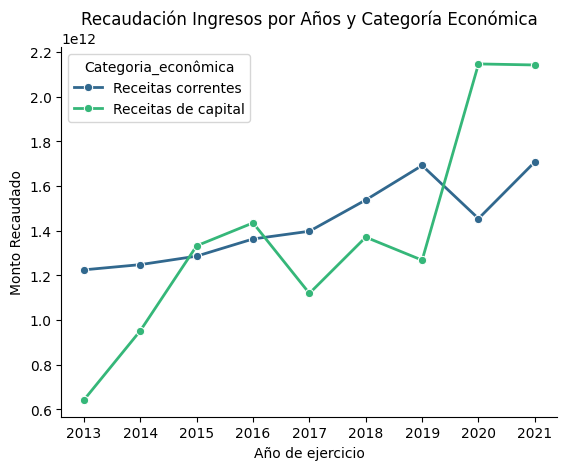

In [802]:
#genera la cuarta visualizacion (recaudacion de ingresos por categoria economica y años)
sns.lineplot(x = df_ingresos_año_categoria["Ano_exercício"],
              y = df_ingresos_año_categoria["Valor_realizado"], 
              hue = df_ingresos_año_categoria["Categoria_econômica"],
               marker = "o", 
                linewidth = 2, 
                palette="viridis", 
                errorbar = None)

plt.title("Recaudación Ingresos por Años y Categoría Económica")
plt.xlabel("Año de ejercicio")
plt.ylabel("Monto Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

En este gráfico se puede observar como la recaudación de ingresos corrientes ha seguido una trayectoria bastante más lineal y estable que la de ingresos de capital. En el caso de los ingresos corrientes se observa que la recaudación proveniente de esta categoría económica sigue una ligera tendencia alcista aunque con un descenso bastante claro en el 2020 (pasando de recaudar 1,69 billones en 2019 a 1,45 billones en 2020). El mínimo está en 2013 con 1,22 billones y el máximo en 2021 con un 1,70 billones. En cuanto a la recaudación proveniente de los ingresos de capital, parece que esta ha seguido una trayectoria alcista de forma general con el paso de los años, pues se pasa de 0,64 billones en 2013 a 2,14 billones en 2021. Sin embargo, en relación a estos ingresos se observa una mayor fluctuación a lo largo de los años. De 2013 a 2016 la recaudación aumenta, luego cae en 2017, vuelve a recuperarse en 2018, y vuelve a caer en 2019. De 2019 a 2020 se ve el cambio más drástico, pues pasa de 1,26 billones a 2,14 billones. Es curioso pues 2020 parece que fue un mal año en la recaudación de ingresos corrientes y sin embargo el mejor año en la de ingresos de capital

De igual forma que he observado está comparación entre el % sobre la recaudación en términos de cantidad o monetarios para las categorías económicas, ahora voy a pasar a hacerlo para los órganos superiores

In [803]:
#genera el dataframe para la quinta visualizacion (recaudacion de ingresos por organos superiores)
df_ingresos_organos = df.groupby("Nome_órgão_superior")["Valor_realizado"].sum()
df_ingresos_organos = df_ingresos_organos.reset_index()
df_ingresos_organos["%/Total"] = round((df_ingresos_organos["Valor_realizado"] / total_ingresos)*100,2)
df_ingresos_organos

,Nome_órgão_superior,Valor_realizado,%/Total
0,Advocacia-geral da união,3.349630e+08,0.00
1,Controladoria-geral da união,7.555037e+06,0.00
2,"Ministério da agricultura, pecuária e abastec",5.643395e+10,0.22
3,Ministério da cidadania,5.143388e+09,0.02
4,"Ministério da ciência, tecnologia, inovações",3.479113e+10,0.14
5,Ministério da defesa,1.046657e+11,0.41
6,Ministério da economia,2.470975e+13,96.38
7,Ministério da educação,2.215894e+11,0.86
8,Ministério da infraestrutura,1.362069e+11,0.53
9,Ministério da justiça e segurança pública,2.521915e+10,0.10


Me voy a quedar únicamente con los 5 órganos superiores con mayor % sobre la recaudación total para la visualización 

In [804]:
#devuelve los 5 primeros organos con mayor recaudacion
df_ingresos_organos = df_ingresos_organos.nlargest(5, columns="%/Total")
df_ingresos_organos

,Nome_órgão_superior,Valor_realizado,%/Total
6,Ministério da economia,2.470975e+13,96.38
7,Ministério da educação,2.215894e+11,0.86
17,Ministério de minas e energia,1.914859e+11,0.75
8,Ministério da infraestrutura,1.362069e+11,0.53
5,Ministério da defesa,1.046657e+11,0.41


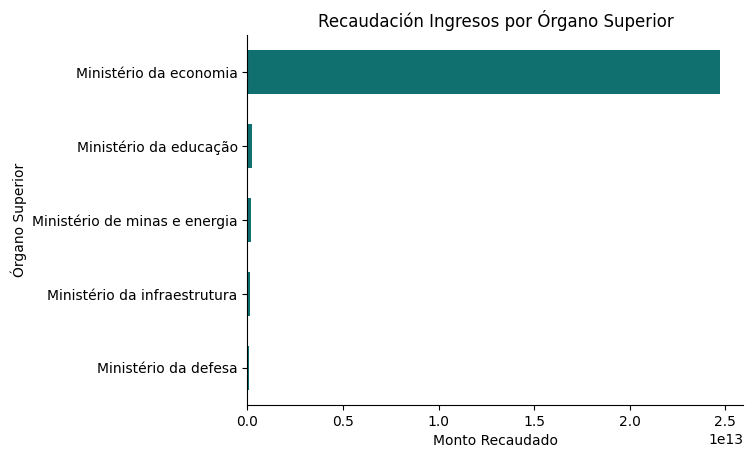

In [805]:
#genera la quinta visualizacion (recaudacion ingresos por organo superior)
sns.barplot(x="Valor_realizado", 
            y="Nome_órgão_superior",
            data=df_ingresos_organos,
            color="teal",
            width=0.6
            ) 

plt.title("Recaudación Ingresos por Órgano Superior")
plt.ylabel("Órgano Superior")
plt.xlabel("Monto Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

En el análisis exploratorio, el Ministerio de Educación y el Ministerio de Economía eran los dos que más veces aparecían en los registros (con un 35,26% y 20,23% respectivamente). Es decir, entre los dos, aparecían en algo más del 55% de los registros y apuntaba a que serían por tanto los que más habrían recaudado entre 2013 y 2021. Sin embargo, los datos de la recaudación en términos monetarios reflejan que el Minesterio de Economía es el órgano superior que entre 2013 y 2021 se ha llevado el 96,38% de la recaudación con 24,7 billones. Es decir, este ministerio recauda los ingresos el 20,23% de las veces y es quien más dinero recauda con diferencia ósea que recauda en cantidades muy grandes cada vez que lo hace. Sin embargo, el ministerio de educación, que recauda algo más pues recauda el 35,26% de las veces, en términos monetarios recauda infinitamente menos ya que se lleva únicamente el 0,86% de la recaudación total en los 9 años de estudio, que son 0,22 billones. Es decir, este ministerio, recauda en cantidades de dinero mucho más pequeñas. Seguidos de estos dos tenemos el Ministerio de Minas y Energía, el Ministerio de Infraestructura y el Ministerio de Defensa, que han recaudado 0,19 billones (0,75% de la recaudación total), 0,13 billones (0,53% de la recaudación total) y 0,1 billones (0,41% de la recaudación total) respectivamente

Ahora, sabiendo que el Ministerio de Economía es quien se ha llevado en estos 9 años el 96% de la recaudación, voy a observar específicamente la trayectoria en la recaudación de este Ministerio que ha seguido con el paso de los años

In [806]:
#se queda con los registros cuyo organo superior es el ministerio de economia 
df_ministerio_economia = df[df["Nome_órgão_superior"] == "Ministério da economia"]
df_ministerio_economia.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
590,Ministério da economia,Ministério da economia - unidades com vínculo ...,Secretaria da receita federal do brasil-rfb,Receitas correntes,"Impostos, taxas e contribuições de melhoria",Impostos,Retido nas fontes - trabalho,0.000000e+00,3.604863e+10,0.000000e+00,0.0,2013-12-31,2013,12.0
591,Ministério da economia,"Instituto nacional de metrologia, qualidade e ...",Instituto nac.de metrolog. qualid. e tecnolog,Receitas de capital,Alienação de bens,Alienação de bens móveis,Alienacao de veiculos,4.737640e+05,0.000000e+00,1.356250e+06,286.0,2013-12-31,2013,12.0
592,Ministério da economia,Ministério da economia - unidades com vínculo ...,Setorial orcamentaria e financeira / me,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.divida ativa cofins - principal,5.203976e+08,0.000000e+00,4.420626e+09,849.0,2013-12-31,2013,12.0
593,Ministério da economia,Ministério da economia - unidades com vínculo ...,Coordenacao-geral de orc. e financas/mp,Receitas correntes,Outras receitas correntes,"Multas administrativas, contratuais e judicia",Multas e juros de mora de laudemios,1.918718e+06,0.000000e+00,0.000000e+00,0.0,2013-12-31,2013,12.0
594,Ministério da economia,Ministério da economia - unidades com vínculo ...,Setorial orcamentaria e financeira / me,Receitas correntes,"Impostos, taxas e contribuições de melhoria",Impostos,Retido nas fontes - trabalho,6.302073e+10,0.000000e+00,6.747989e+10,107.0,2013-12-31,2013,12.0


In [807]:
#genera el dataframe para la sexta visualizacion (recaudacion de ingresos por ministerio de economia y años)
df_ingresos_año_ministerio = df_ministerio_economia.groupby("Ano_exercício")["Valor_realizado"].sum()
df_ingresos_año_ministerio = df_ingresos_año_ministerio.reset_index()
df_ingresos_año_ministerio

,Ano_exercício,Valor_realizado
0,2013,1.817203e+12
1,2014,2.157444e+12
2,2015,2.580696e+12
3,2016,2.735629e+12
4,2017,2.454951e+12
5,2018,2.853017e+12
6,2019,2.808484e+12
7,2020,3.531378e+12
8,2021,3.770951e+12


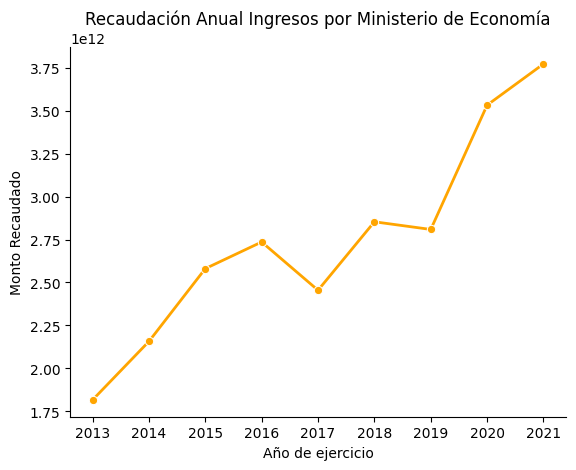

In [808]:
#genera la sexta visualizacion (recaudacion de ingresos por ministerio de economia y años)
sns.lineplot(x = df_ingresos_año_ministerio["Ano_exercício"],
              y = df_ingresos_año_ministerio["Valor_realizado"], 
               marker = "o", 
                linewidth = 2, 
                color="orange", 
                errorbar = None)

plt.title("Recaudación Anual Ingresos por Ministerio de Economía")
plt.xlabel("Año de ejercicio")
plt.ylabel("Monto Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

La recaudación por parte del Ministerio de Economía ha fluctuado bastante de 2013 a 2021 siguiendo una tendencia alcista, aunque con decrecimientos en 2017 y 2019. En 2013 el Ministerio de Economía recaudó 1,81 billones finalizando en 2021 con una recaudación de 3,77 billones. Es decir, en estos 9 años ha logrado un aumento de casi 2 billones. En 2017 tuvo una caída en la recaudación, pasando de 2,73 billones en 2016 a 2,45 billones en 2017. Luego en 2018 recuperó de nuevo, pero en 2019 volvió a sufrir una caída aunque esta vez bastante menos notable. Pasó de 2,85 billones en 2018 a 2,80 billones en 2019. Por la tendencia alcista que ha seguido en estos 9 años, parece que si el Ministerio continúa con esta misma trayectoria, podría en unos años estar alcanzando aún cifras de recaudación bastante más elevadas

Lo que he observado a través de todos estos gráficos es que parece que la recaudación con el paso de los años muestra un crecimiento que sugiere un escenario bastante optimista de forma general

### Análisis ingresos previstos vs ingresos recaudados

Me interesa conocer el total de ingresos previstos entre 2013 y 2021

In [809]:
#calcula el total de los ingresos previstos para todos los años
total_ingresos_previstos = df["Valor_previsto_atualizado"].sum()
total_ingresos_previstos

np.float64(28337573811868.727)

In [810]:
#calcula la diferencia entre los ingresos previstos y los recaudados finalmente 
total_ingresos_previstos - total_ingresos

np.float64(2700191376422.7227)

In [811]:
#calcula el percentual realizado para todos los años 
(total_ingresos / total_ingresos_previstos)*100

np.float64(90.47133888614066)

La previsión en la recaudación del gobierno de Brasil entre 2013 y 2021 fue de 28.337.573.811.868 BRL. La recaudación real fue de 25.637.382.435.446 BRL. Es decir, en términos generales hubo una sobreestimación. Concretamente, del 9,53%. Se preveía haber recaudado unos 270.019.137.642 BRL más

De igual forma que he observado esta diferencia para todos los años, ahora lo voy a observar año a año 

In [812]:
#genera el dataframe para la septima visualizacion (percentual por años)
df_previsiones_año = df.groupby("Ano_exercício").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_previsiones_año = df_previsiones_año.reset_index()
df_previsiones_año["Percentual_realizado"] = round((df_previsiones_año["Valor_realizado"] / df_previsiones_año["Valor_previsto_atualizado"])*100,2)
df_previsiones_año

,Ano_exercício,Valor_realizado,Valor_previsto_atualizado,Percentual_realizado
0,2013,1.893614e+12,2.174651e+12,87.08
1,2014,2.238551e+12,2.392129e+12,93.58
2,2015,2.665685e+12,2.878828e+12,92.60
3,2016,2.839712e+12,2.952696e+12,96.17
4,2017,2.558047e+12,3.414380e+12,74.92
5,2018,2.942388e+12,3.505648e+12,83.93
6,2019,2.991565e+12,3.261379e+12,91.73
7,2020,3.631449e+12,3.577147e+12,101.52
8,2021,3.876372e+12,4.180716e+12,92.72


La columna del percentual va a ser calculada siempre como la división entre el valor realizado / valor previsto actualizado. A través del percentual podemos concluir dos cosas. La primera, si ha habido subestimación o sobreestimación. En caso de sobreestimación el percentual será menor que el 100% pues la previsión > lo recaudado realmente. En caso de subestimación, el percentual será mayor al 100%, pues lo recaudado > la previsión. La segunda, el nivel de precisión en las estimaciones. Es decir, cuanto más se acerque el percentual al 100%, más precisa habrá sido la previsión

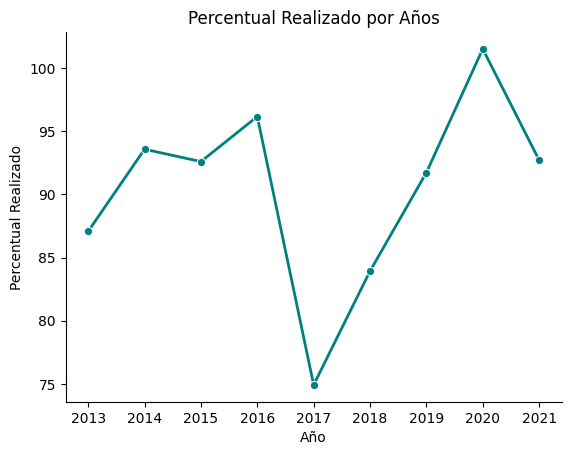

In [813]:
#genera la septima visualizacion (percentual por años)
sns.lineplot(x = df_previsiones_año["Ano_exercício"],
              y = df_previsiones_año["Percentual_realizado"], 
               marker = "o", 
                linewidth = 2, 
                color="teal", 
                errorbar = None)

plt.title("Percentual Realizado por Años")
plt.xlabel("Año")
plt.ylabel("Percentual Realizado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Lo que se puede observar en este gráfico es que de forma general se tiende a la sobreestimación, ya que únicamente en el 2020 se produce subestimación, y que es precisamente este mismo año en el que la previsión es más precisa (se prevén 3,57 billones y se recaudan 3,63 billones), es decir, se cumple con el objetivo y además se supera en un 1,52%, seguido del 2016 (se prevén 2,95 billones y se recaudan 2,83 billones) logrando el 96,17% del objetivo previsto. Los años de peores previsiones son el 2017 (se prevén 3,41 billones y se recaudan 2,55 billones) y el 2018 (se prevén 3,5 billones y se recaudan 2,94 billones) donde se logran el 74,92% y el 83,93% de los objetivos previstos respectivamente

Ahora, este percentual realizado puede interesar calcularlo por órgano superior o por categoría económica

Por órgano superior

In [814]:
#genera el dataframe para la octava visualizacion (percentual por organo superior)
df_previsiones_organo = df.groupby("Nome_órgão_superior").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_previsiones_organo = df_previsiones_organo.reset_index()
df_previsiones_organo["Percentual_realizado"] = round((df_previsiones_organo["Valor_realizado"] / df_previsiones_organo["Valor_previsto_atualizado"])*100,2)
df_previsiones_organo = df_previsiones_organo.sort_values(by= "Percentual_realizado")
df_previsiones_organo

,Nome_órgão_superior,Valor_realizado,Valor_previsto_atualizado,Percentual_realizado
1,Controladoria-geral da união,7.555037e+06,7.406929e+08,1.02
0,Advocacia-geral da união,3.349630e+08,3.726054e+09,8.99
3,Ministério da cidadania,5.143388e+09,4.395888e+10,11.70
19,Ministério do desenvolvimento regional,1.935649e+10,1.259673e+11,15.37
10,"Ministério da mulher, família e direitos huma",2.116892e+08,8.433669e+08,25.10
24,Presidência da república,1.649184e+10,6.413081e+10,25.72
7,Ministério da educação,2.215894e+11,6.095859e+11,36.35
12,Ministério da previdência social,1.424078e+07,3.732740e+07,38.15
20,Ministério do esporte,5.389624e+07,1.209097e+08,44.58
5,Ministério da defesa,1.046657e+11,1.985228e+11,52.72


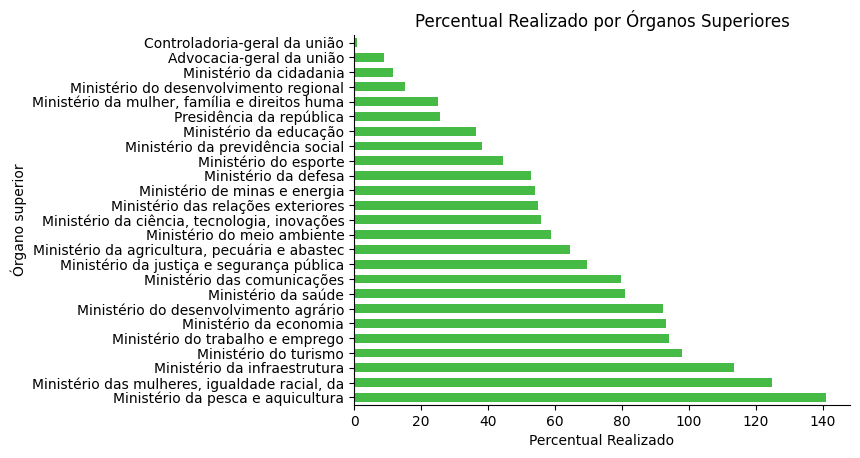

In [815]:
#genera la octava visualizacion (percentual por organo superior)
sns.barplot(x="Percentual_realizado", 
            y="Nome_órgão_superior",
            data=df_previsiones_organo,
            color="limegreen",
            width=0.6
            ) 

plt.title("Percentual Realizado por Órganos Superiores")
plt.ylabel("Órgano superior")
plt.xlabel("Percentual Realizado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Todos los órganos superiores con excepción al Ministério da infraestrutura, el Ministério das mulheres, igualdade racial, da y el Ministério da pesca e aquicultura tienden a la sobreestimación. El Ministério da pesca e aquicultura tiene una previsión de 40,9 millones y un valor recaudado de 57,7 millones. Es decir, ha logrado cumplir con su objetivo y superarlo en un 41,06%. El órgano superior cuya previsión es más precisa es el Ministério do turismo logrando su objetivo en un 97,88%. A lo largo de los años de estudio, el Ministerio de turismo ha previsto recaudar 13,8 mil millones y finalmente ha recaudado 13,5 mil millones. Lo que realmente interesa estudiar son las áreas problemáticas, es decir, en este caso, el órgano superior cuya previsión ha sido la peor, y este es el órgano Controladoria-geral da união con un percentual del 1,02%. Este órgano preveía recaudar 740 millones entre 2013 y 2021 y finalmente ha recaudado 7,55 millones, es decir, el valor realizado se aleja bastante del valor previsto, pues el valor realizado es bastante menor. Y esto puede resultar un problema. ¿Por qué este órgano superior cree que va a recaudar mucho más dinero de lo que finalmente termina recaudando? ¿Qué es lo que pasa? Otros órganos como Advocacia-geral da união, Ministério da cidadania o Ministério do desenvolvimento regional disponen de unos percentuales de 8,99%, 11,70% y 15,37% respectivamente, lo que también son indicativos de una mala previsión

Una vez detectado el órgano superior con mayor problemática a la hora de recaudar cantidades de dinero considerablemente menores a las previstas, podría interesar, para obtener más detalle, identificar concretamente dentro de este órgano superior, que entidad gubernamental específica así como la unidad gestora cuyo percentual realizado es menor

In [816]:
#devuelve los registros donde el organo superior es Controladoria-geral da união
organo_problematico = df[df["Nome_órgão_superior"] == "Controladoria-geral da união"]
organo_problematico.sample()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
15587,Controladoria-geral da união,Controladoria-geral da união,Diretoria de gestao interna/se/cgu,Receitas correntes,Outras receitas correntes,"Multas administrativas, contratuais e judicia",Multas e juros previstos em contratos-princ.,0.0,0.0,246.0,0.0,2016-12-15,2016,12.0


In [817]:
#genera el dataframe para la novena visualizacion (percentual por entidad gubernamental especifica)
df_previsiones_org = organo_problematico.groupby("Nome_órgão").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_previsiones_org = df_previsiones_org.reset_index()
df_previsiones_org["Percentual_realizado"] = round((df_previsiones_org["Valor_realizado"] / df_previsiones_org["Valor_previsto_atualizado"])*100,2)
df_previsiones_org

,Nome_órgão,Valor_realizado,Valor_previsto_atualizado,Percentual_realizado
0,Controladoria-geral da união,4346194.92,19176752.0,22.66
1,Controladoria-geral da união - unidades com ví...,3208842.53,721516104.0,0.44


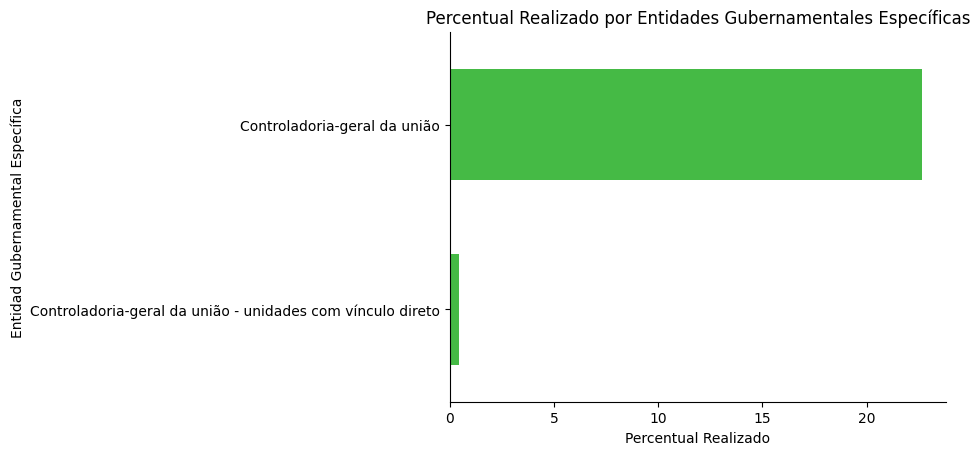

In [818]:
#genera la novena visualizacion (percentual por entidad gubernamental especifica)
sns.barplot(x="Percentual_realizado", 
            y="Nome_órgão",
            data=df_previsiones_org,
            color="limegreen",
            width=0.6
            ) 

plt.title("Percentual Realizado por Entidades Gubernamentales Específicas")
plt.ylabel("Entidad Gubernamental Específica")
plt.xlabel("Percentual Realizado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Partiendo del órgano superior Controladoria-geral da união, parece que la entidad gubernamental específica Controladoria-geral da união - unidades com vínculo direto es la que realiza previsiones menos precisas. En los 9 años de estudio, había previsto recaudar 721.516.104 BRL y finalmente recaudó 3.208.842,53 BRL, es decir, solo ha logrado alcanzar el 0,44% del objetivo previsto

In [819]:
#comprueba que a la entidad gubernamental especifica Controladoria-geral da união - unidades com vínculo direto le corresponde mas de una unidad gestora
filtro1 = organo_problematico[organo_problematico["Nome_órgão"] == "Controladoria-geral da união - unidades com vínculo direto"]
filtro1["Nome_unidade_gestora"].unique()


array(['Diretoria de gestao interna(cgu)'], dtype=object)

Puesto que a la entidad gubernamental específica Controladoria-geral da união - unidades com vínculo direto únicamente le corresponde una única unidad gestora, se puede terminar concluyendo que dentro de la entidad gubernamental superior con mayor problemática en su previsión (Controladoria-geral da união), la entidad gubernamental específica Controladoria-geral da união - unidades com vínculo direto y la unidad gestora Diretoria de gestao interna(cgu) son las dos con una mayor sobreestimación en la recaudación de sus ingresos

También, podría interesar observar si este problema en las previsiones del órgano superior Controladoria-geral da união se ha mantenido a lo largo de todos los años de estudio, o si en los últimos años el problema se ha ido incrementando, por ejemplo

In [820]:
#genera el dataframe para la decima visualizacion (percentual por años para Controladoria-geral da união)
df_percentual_año = organo_problematico.groupby("Ano_exercício").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_percentual_año = df_percentual_año.reset_index()
df_percentual_año["Percentual_realizado"] = round((df_percentual_año["Valor_realizado"] / df_percentual_año["Valor_previsto_atualizado"])*100,2)
df_percentual_año

,Ano_exercício,Valor_realizado,Valor_previsto_atualizado,Percentual_realizado
0,2013,1250774.97,2203603.0,56.76
1,2014,266947.18,5049180.0,5.29
2,2015,884447.32,6165260.0,14.35
3,2016,1277912.59,5758709.0,22.19
4,2017,3863278.55,6184782.0,62.46
5,2018,11676.84,2559536.0,0.46
6,2020,0.00,103883676.0,0.00
7,2021,0.00,608888110.0,0.00


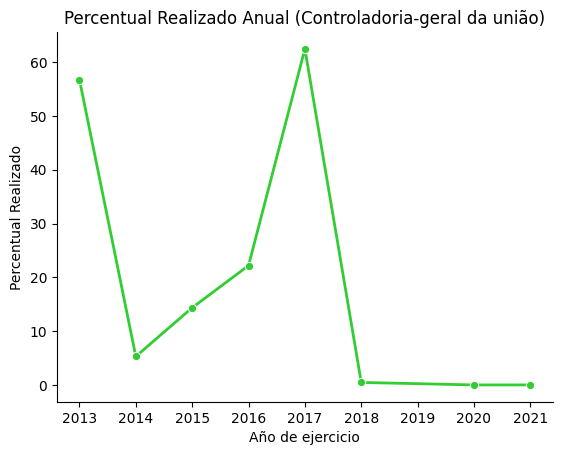

In [821]:
#genera la decima visualizacion (percentual por años para Controladoria-geral da união)
sns.lineplot(x = df_percentual_año["Ano_exercício"],
              y = df_percentual_año["Percentual_realizado"], 
               marker = "o", 
                linewidth = 2, 
                color="limegreen", 
                errorbar = None)

plt.title("Percentual Realizado Anual (Controladoria-geral da união)")
plt.xlabel("Año de ejercicio")
plt.ylabel("Percentual Realizado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

A través de este gráfico se puede observar que el percentual realizado muestra bastante variabilidad a lo largo de los años. En años como 2017 el porcentaje fue relativamente alto con un 62,46%, es decir, se logro un 62,46% del objetivo previsto, pero en otros años como el 2014 o el 2018 el % es muy bajo (5,29% y 0,46% respectivamente). Además, en el 2020 y 2021 el porcentaje es 0% ya que no se recaudó nada, lo que puede ser indicador de serios problemas en la ejecución de los ingresos o en la recolección de los datos. Especialmente en los últimos años, el órgano ha tenido serias dificultades para cumplir con lo previsto

Ahora paso a analizar lo mismo pero por categoría económica

In [822]:
#genera el dataframe para la undecima visualizacion (percentual por categoria economica)
df_previsiones_categoria = df.groupby("Categoria_econômica").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_previsiones_categoria = df_previsiones_categoria.reset_index()
df_previsiones_categoria["Percentual_realizado"] = round((df_previsiones_categoria["Valor_realizado"] / df_previsiones_categoria["Valor_previsto_atualizado"])*100,2)
df_previsiones_categoria = df_previsiones_categoria.drop([4], axis=0)
df_previsiones_categoria = df_previsiones_categoria.sort_values(by= "Percentual_realizado")
df_previsiones_categoria

,Categoria_econômica,Valor_realizado,Valor_previsto_atualizado,Percentual_realizado
2,Receitas de capital,1.240714e+13,1.448575e+13,85.65
0,Receitas correntes,1.290934e+13,1.354953e+13,95.28
1,Receitas correntes - intra-orçamentárias,2.926518e+11,2.914850e+11,100.40
3,Receitas de capital - intra-orçamentárias,2.825084e+10,1.080841e+10,261.38


En el caso de las categorías económicas, la categoría "Sin información" se ha eliminado ya que la previsión era de cero y no nos aporta información relevante

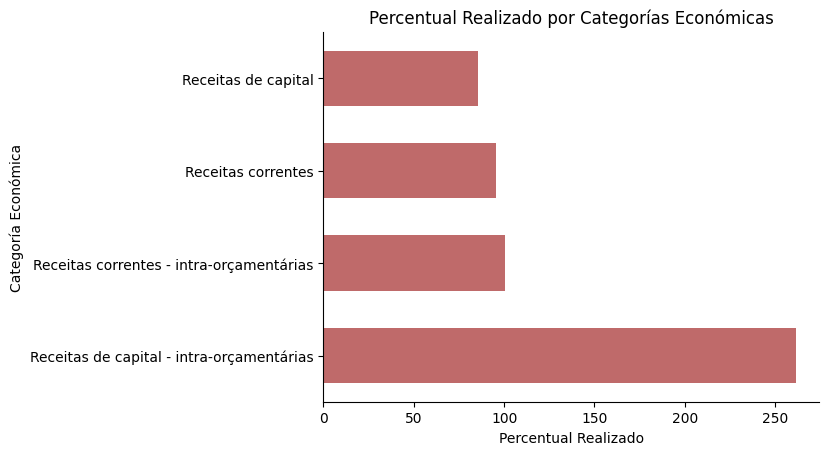

In [823]:
#genera la undecima visualizacion (percentual por categoria economica)
sns.barplot(x="Percentual_realizado", 
            y="Categoria_econômica",
            data=df_previsiones_categoria,
            color="indianred",
            width=0.6
            ) 

plt.title("Percentual Realizado por Categorías Económicas")
plt.ylabel("Categoría Económica")
plt.xlabel("Percentual Realizado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Para las categorías económicas Receitas de capital y Receitas correntes, se produce una sobreestimación en la recaudación de los ingresos provenientes de las mismas entre 2013 y 2021. En el caso de Receitas de capital se alcanza el 85,65% del objetivo previsto (se prevé recaudar 14,4 billones y se recaudan 12,4 billones) y en el caso de las Receitas correntes el 95,28% (se prevé recaudar 13,5 billones y se recaudan 12,9 billones). Por el contrario, para las categorías económicas Receitas correntes - intra-orçamentárias y Receitas de capital - intra-orçamentárias, se produce una subestimación en la recaudación de los ingresos provenientes de las mismas entre 2013 y 2021. En el caso de Receitas correntes - intra-orçamentárias	se produce la previsión más exacta, alcanzando el objetivo previsto y superándolo en un 0,40% (se prevé recaudar 291,48 mil millones y se recaudan 292,6 mil millones). En el caso de Receitas de capital - intra-orçamentárias se produce la mayor subestimación, superando el objetivo previsto en un 161,38% (se prevé recaudar 10,8 mil millones y se recaudan 28,25 mil millones). En cuanto a las categorías económicas, no hay una que concretamente parezca muy problemática en términos de subestimación pero la más problemática sería la categoría Receitas de capital asique ahora voy a pasar a analizar dentro de esta categoría, la fuente específica, el tipo de ingreso y el detalle adicional donde se produce la mayor subestimación

Una vez detectada la categoría económica con mayor problemática a la hora de recaudar cantidades de dinero menores a las previstas, podría interesar, para obtener más detalle,  identificar concretamente dentro de esta categoría económica, que fuente específica, que tipo de ingreso y que detalle adicional del ingreso disponen de un percentual realizado menor

In [824]:
#devuelve los registros donde la categoria economica es Receitas de capital 
categoria_problematica = df[df["Categoria_econômica"] == "Receitas de capital"]
categoria_problematica.sample()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
214311,"Ministério da agricultura, pecuária e abastec",Instituto nacional de colonização e reforma ag...,Dpto. de administracao financeira-daf - incra,Receitas de capital,Amortizações de empréstimos,Amortizações de empréstimos,Amortizacao emprestimos contratuais-mul.jur.,0.0,0.0,1.83,0.0,2017-11-10,2017,11.0


In [825]:
#genera el dataframe para la duodecima visualizacion (percentual por la fuente especifica de ingresos)
df_previsiones_fuente = categoria_problematica.groupby("Origem_receita").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_previsiones_fuente = df_previsiones_fuente.reset_index()
df_previsiones_fuente["Percentual_realizado"] = round((df_previsiones_fuente["Valor_realizado"] / df_previsiones_fuente["Valor_previsto_atualizado"])*100,2)
df_previsiones_fuente = df_previsiones_fuente.sort_values(by= "Percentual_realizado")
df_previsiones_fuente

,Origem_receita,Valor_realizado,Valor_previsto_atualizado,Percentual_realizado
0,Alienação de bens,2.692501e+10,6.945990e+10,38.76
4,Transferências de capital,4.786975e+08,1.089635e+09,43.93
2,Operações de crédito,9.857798e+12,1.277686e+13,77.15
3,Outras receitas de capital,1.722901e+12,1.169948e+12,147.26
1,Amortizações de empréstimos,7.990345e+11,4.683929e+11,170.59


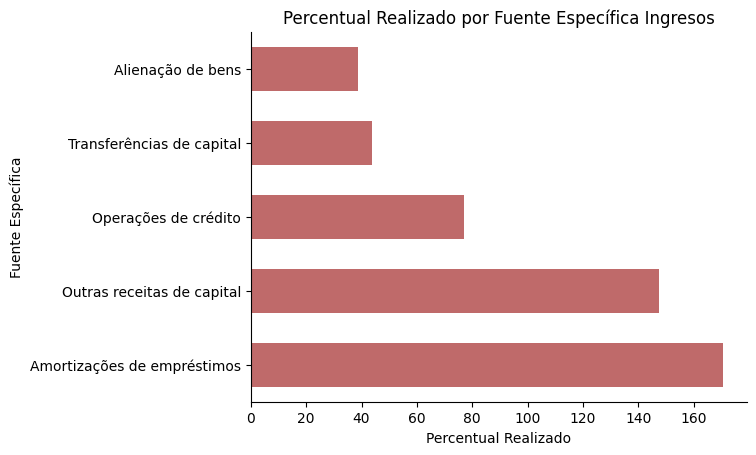

In [826]:
#genera la duodecima visualizacion (percentual por la fuente especifica de ingresos)
sns.barplot(x="Percentual_realizado", 
            y="Origem_receita",
            data=df_previsiones_fuente,
            color="indianred",
            width=0.6
            ) 

plt.title("Percentual Realizado por Fuente Específica Ingresos")
plt.ylabel("Fuente Específica")
plt.xlabel("Percentual Realizado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [827]:
#filtra para quedarse con aquellos registros que en categoria_problematica su Origem_receita es Alienação de bens
filtro1 = categoria_problematica[categoria_problematica["Origem_receita"] == "Alienação de bens"]
filtro1.sample()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
193818,Ministério do desenvolvimento regional,Departamento nacional de obras contra as secas,Departamento nac. de obras contra as secas/uo,Receitas de capital,Alienação de bens,Alienação de bens imóveis,Alienacao de bens imoveis-principal,0.0,0.0,5230.43,0.0,2016-12-05,2016,12.0


In [828]:
#genera el dataframe para la decimotercera visualizacion (percentual por el tipo de ingreso)
df_previsiones_tipo = filtro1.groupby("Espécie_receita").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_previsiones_tipo = df_previsiones_tipo.reset_index()
df_previsiones_tipo["Percentual_realizado"] = round((df_previsiones_tipo["Valor_realizado"] / df_previsiones_tipo["Valor_previsto_atualizado"])*100,2)
df_previsiones_tipo = df_previsiones_tipo.sort_values(by= "Percentual_realizado")
df_previsiones_tipo

,Espécie_receita,Valor_realizado,Valor_previsto_atualizado,Percentual_realizado
0,Alienação de bens imóveis,1.708018e+09,3.715869e+10,4.60
1,Alienação de bens intangíveis,4.041282e+09,1.711980e+10,23.61
2,Alienação de bens móveis,2.117571e+10,1.518141e+10,139.48


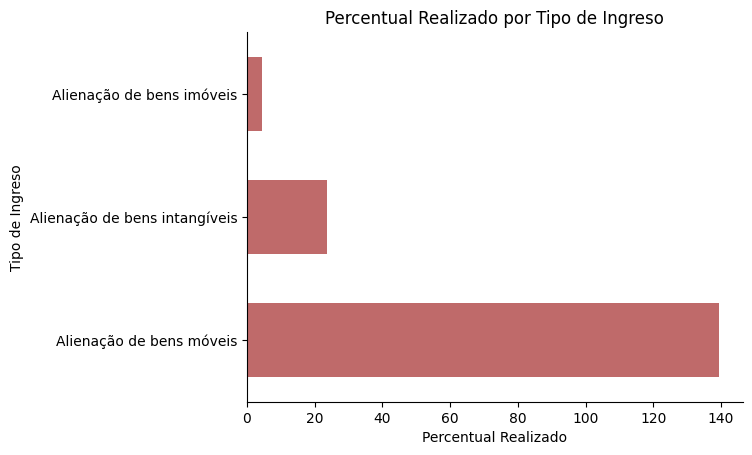

In [829]:
#genera la decimotercera visualizacion (percentual por el tipo de ingreso)
sns.barplot(x="Percentual_realizado", 
            y="Espécie_receita",
            data=df_previsiones_tipo,
            color="indianred",
            width=0.6
            ) 

plt.title("Percentual Realizado por Tipo de Ingreso")
plt.ylabel("Tipo de Ingreso")
plt.xlabel("Percentual Realizado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [830]:
#filtra para quedarse con aquellos registros que en filtro1 su Espécie_receita es Alienação de bens imóveis
filtro2 = filtro1[filtro1["Espécie_receita"] == "Alienação de bens imóveis"]
filtro2.sample()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
558207,Ministério do desenvolvimento regional,Departamento nacional de obras contra as secas,Departamento nac. de obras contra as secas/uo,Receitas de capital,Alienação de bens,Alienação de bens imóveis,Alienacao de bens imoveis-principal,0.0,0.0,1713.78,0.0,2018-05-25,2018,5.0


In [831]:
#genera el dataframe para la decimocuarta visualizacion (percentual por el detalle adicional del ingreso)
df_previsiones_detalle = filtro2.groupby("Detalhamento").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_previsiones_detalle = df_previsiones_detalle.reset_index()
df_previsiones_detalle["Percentual_realizado"] = round((df_previsiones_detalle["Valor_realizado"] / df_previsiones_detalle["Valor_previsto_atualizado"])*100,2)
df_previsiones_detalle = df_previsiones_detalle.sort_values(by= "Percentual_realizado")
df_previsiones_detalle = df_previsiones_detalle.nsmallest(5, columns="Percentual_realizado")
df_previsiones_detalle

,Detalhamento,Valor_realizado,Valor_previsto_atualizado,Percentual_realizado
0,Alien. bens imoveis de dom da uniao-dom diret,-6.473290e+03,1.035100e+04,-62.54
3,Alienacao de bens imoveis-divida ativa,0.000000e+00,1.895569e+07,0.00
11,Alienacao de outros bens imoveis,0.000000e+00,6.581327e+09,0.00
1,Alien. bens imoveis de dom da uniao-dom pleno,6.702628e+07,8.086472e+09,0.83
7,Alienacao de bens imoveis-principal,7.448173e+08,2.134756e+10,3.49


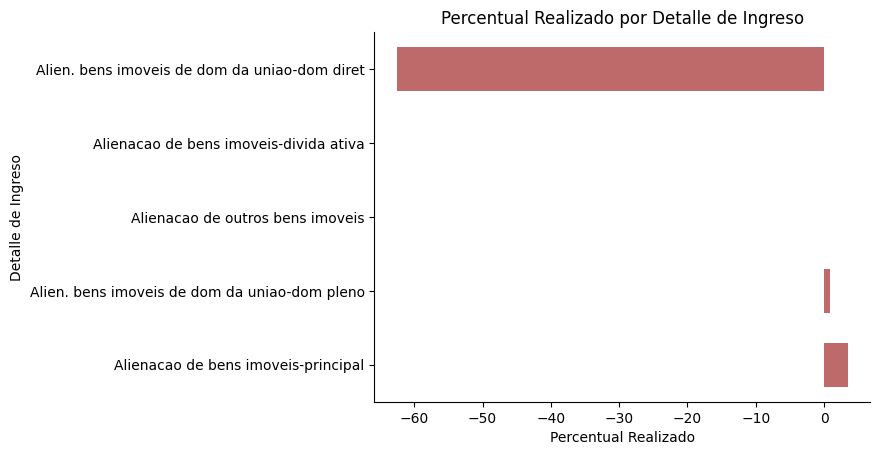

In [832]:
#genera la decimocuarta visualizacion (percentual por el detalle adicional del ingreso)
sns.barplot(x="Percentual_realizado", 
            y="Detalhamento",
            data=df_previsiones_detalle,
            color="indianred",
            width=0.6
            ) 

plt.title("Percentual Realizado por Detalle de Ingreso")
plt.ylabel("Detalle de Ingreso")
plt.xlabel("Percentual Realizado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Dentro de la categoría con mayor problemática en la previsión de los ingresos provenientes de la misma (Receitas de capital) entre 2013 y 2021, parece que la fuente específica de ingresos Alienação de bens es la que sufre una mayor sobreestimación, con un percentual realizado del 38,76% (se prevé recaudar 69,45 mil millones y se recaudan 26,92 mil millones), frente a otras como Outras receitas de capital o Amortizações de empréstimos que presentan una clara subestimación con percentuales del 147,26% y del 170,59% respectivamente. Dentro de la fuente específica de ingresos Alienação de bens, el tipo de ingreso Alienação de bens imóveis sufre la mayor sobreestimación, alcanzando únicamente el 4,60% de su objetivo previsto (se prevé recaudar 37,15 mil millones y se recaudan 1,70 mil millones), frente a otros tipos de ingresos como Alienação de bens móveis que alcanza su objetivo y además lo supera en un 39,48%. Por último, dentro del tipo de ingreso Alienação de bens imóveis, el detalle adicional de ingresos Alien. bens imoveis de dom da uniao-dom diret presenta sorprendentemente un percentual realizado negativo de -62,54% (se prevé recaudar 10,35 mil BRL y se finaliza con un valor realizado de -6,47 mil BRL), frente a otros como Alienacao de bens imoveis-divida ativa	o Alienacao de outros bens imoveis cuyo percentual es del 0% porque entre 2013 y 2021 no se ha recaudado nada de los mismos, o otros como Alien. bens imoveis de dom da uniao-dom pleno o Alienacao de bens imoveis-principal, cuyos percentuales son de un 0,83% y un 3,49% respectivamente, es decir, se ha recaudado mucho menos dinero de lo que se preveía de estas dos partidas de ingresos

También, podría interesar observar si esta variación entre lo previsto y lo recaudado en la categoría Receitas de capital se ha mantenido a lo largo de todos los años de estudio, o si en los últimos años el problema se ha ido incrementando, por ejemplo

In [833]:
#genera el dataframe para la decimoquinta visualizacion (percentual por años para Receitas de capital)
df_percentual_año_cat = categoria_problematica.groupby("Ano_exercício").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_percentual_año_cat = df_percentual_año_cat.reset_index()
df_percentual_año_cat["Percentual_realizado"] = round((df_percentual_año_cat["Valor_realizado"] / df_percentual_año_cat["Valor_previsto_atualizado"])*100,2)
df_percentual_año_cat

,Ano_exercício,Valor_realizado,Valor_previsto_atualizado,Percentual_realizado
0,2013,6.423447e+11,8.564219e+11,75.00
1,2014,9.521063e+11,9.840753e+11,96.75
2,2015,1.332216e+12,1.358533e+12,98.06
3,2016,1.434742e+12,1.452012e+12,98.81
4,2017,1.119288e+12,1.927656e+12,58.06
5,2018,1.370787e+12,1.951861e+12,70.23
6,2019,1.267873e+12,1.597270e+12,79.38
7,2020,2.146238e+12,1.841123e+12,116.57
8,2021,2.141542e+12,2.516802e+12,85.09


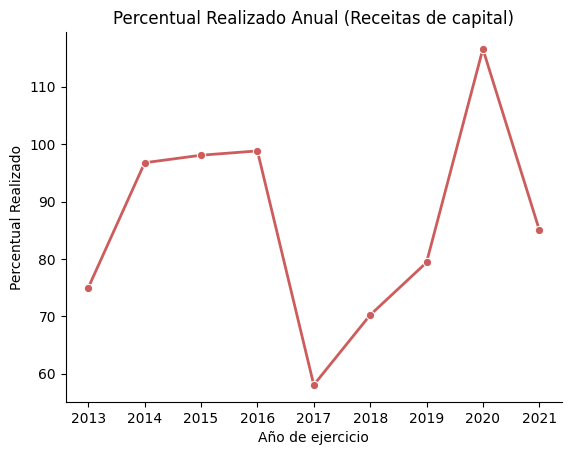

In [834]:
#genera la decimoquinta visualizacion (percentual por años para Receitas de capital)
sns.lineplot(x = df_percentual_año_cat["Ano_exercício"],
              y = df_percentual_año_cat["Percentual_realizado"], 
               marker = "o", 
                linewidth = 2, 
                color="indianred", 
                errorbar = None)

plt.title("Percentual Realizado Anual (Receitas de capital)")
plt.xlabel("Año de ejercicio")
plt.ylabel("Percentual Realizado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

El percentual de la categoría de Receitas de Capital muestra bastante variabilidad a lo largo de los años. De 2013 a 2016, se observa una tendencia hacia una mayor precisión en la previsión, alcanzando valores cercanos al 100% en 2014 (96,75%), 2015 (98,06%) y 2016 (98,81%). Sin embargo, en 2017 el percentual cae significativamente, hasta un 58,06% y en 2018 y 2019 se vuelve a alcanzar algo más de precisión, alcanzando percentuales de 70,23% en 2018 y 79,38% en 2019. El año 2020 destaca pues es el único año donde se registra subestimación alcanzando el objetivo previsto y superándolo en un 16,57%. En el último año, 2021, el percentual cae de nuevo (85,09%) y aunque aumenta con respecto a 2019 no se alcanza una precisión deseada. De forma general, el percentual sufre fultuaciones y más en los últimos años. Las previsiones en los primeros años parecían más precisas

## Principales Resultados de los análisis

### Análisis Ingresos Recaudados
- Análisis Temporal: De 2013 a 2021 el gobierno de Brasil recaudó 25.637.382.435.446 BRL
    - La recaudación sigue una tendencia alcista con el paso de los años, sufriendo un descenso en 2017. Se pasa de 1,89 billones de BR en 2013 a 3,87 billones en 2021.
    - La recaudación no sigue una tendencia clara con el paso de los meses. Septiembre parece ser el mes en el que más se recauda (22,7 millones) y mayo y junio los meses en los que menos (14,8 millones).
- Análisis por categorías económicas:
    - De Ingresos Corrientes e Ingresos de Capital proviene el 98,74% de la recaudación entre 2013 y 2021. Se han recaudado 12,9 billones de ingresos corrientes, que se recaudan con mucha frecuencia y en cantidades más pequeñas de dinero y 12,4 de ingresos de capital, que se recaudan con menor frecuencia pero en cantidades de dinero muy grandes. 
    - La recaudación de ingresos corrientes sigue una tendencia alcista con el paso de los años (pasando de 1,22 billones en 2013 a 1,70 billones en 2021) aunque con un descenso en 2020. La recaudación de ingresos de capital sigue también una tendencia alcista pero con una pendiente más pronunciada (pasando de 0,64 billones en 2013 a 2,14 billones en 2021) y con descensos en 2017 y 2019.
- Análisis por órganos superiores:
    - Es el Ministerio de Economía el órgano que se ha llevado entre 2013 y 2021 el 96,38% de la recaudación con 24,7 billones. Recauda en cantidades muy grandes de dinero. 
    - La recaudación por parte de este ministerio ha seguido una tendencia alcista con los años (pasando de 1,81 billones en 2013 a 3,87 billones en 2021) aunque con descensos en 2017 y 2019.
En un marco general, parece que el pronóstico de la recaudación con el paso de los años es positivo pues se observan tendencias alcistas. 

### Análisis Ingresos Previstos vs Ingresos Recaudados 
- Análisis Temporal: De 2013 a 2021 el gobierno de Brasil hizo una previsión en la recaudación de 28.337.573.811.868 BRL
    - En términos generales, se ha producido una sobreestimación en todos los años excepto en el 2020, año de mayor precisión en la previsión (se prevén 3,57 billones y se recaudan 3,63 billones). El año de peor previsión es 2017 (se prevén 3,41 billones y se recaudan 2,55 billones).
- Análisis por estructuras recaudadoras:
    - La entidad gubernamental superior con una mayor subestimación la previsión de sus ingresos es el Ministério da pesca e aquicultura. Entre 2013 y 2021: Previsión de 40,9 millones y Recaudación de 57,7 millones.
    - La entidad gubernamental superior con previsión más precisa es el Ministério do turismo. Entre 2013 y 2021: Previsión de 13,8 billones y Recaudación de 13,5 billones.
    - La entidad gubernamental superior con mayor problemática en la previsión de sus ingresos es Controladoria-geral da união. Entre 2013 y 2021: Previsión de 740 millones y Recaudación de 7,55 millones.
        - Presenta variabilidad en su percentual realizado con el paso de los años, pero los últimos años son los más críticos (en 2020 y 2021 obtiene 0 ingresos).
        - Entidad gubernamental específica más problemática: Controladoria-geral da união - unidades com vínculo direto. Logra el 0,44% de su objetivo previsto. 
        - Unidad gestora más problemática: Diretoria de gestao interna(cgu). Logra el 0,44% de su objetivo previsto. 
- Análisis por partidas recaudadas:
    - La categoría económica con una mayor subestimación en la previsión de los ingresos provenientes de la misma es Receitas de capital - intra-orçamentárias. Entre 2013 y 2021: Previsión de 10,8 mil millones y Recaudación de 28,25 mil millones.
    - La categoría económica con previsión más precisa es Receitas correntes - intra-orçamentárias. Entre 2013 y 2021: Previsión de 291,48 mil millones y Recaudación de 292,65 mil millones.
    - La categoría económica con mayor problemática en la previsión es Receitas de capital. Entre 2013 y 2021: Previsión de 14,4 billones y Recaudación de 12,4 billones.
        - Presenta variabilidad en su percentual realizado con el paso de los años (sobretodo en los últimos). En los primeros años presentaba una precisión casi total de las previsiones.
        - Fuente específica de ingresos más problemática: Alienação de bens. Logra el 38,76% de su objetivo previsto. 
        - Tipo de ingresos más problemático: Alienação de bens imóveis. Logra el 4,6% de su objetivo previsto. 
        - Detalle adicional del ingreso más problemático: Alien. bens imoveis de dom da uniao-dom diret. Con un percentual realizado de -62,54%.

### Algunas recomendaciones tras los Resultados 
1. Observar que órganos recaudan poco y considerar si vale la pena o no mantenerlos. Si no, juntarlos con otros o cerrarlos para ahorrar dinero y hacer más eficiente la recaudación. 
2. Analizar los tipos de ingresos que aportan poco a la recaudación, pues se puede valorar quitarlos y centrarse en los que tienen un mayor potencial para crecer. 
3. Explorar nuevas maneras de generar ingresos para no depender tanto de las mismas categorías de siempre (Ingresos Corrientes y de Capital). Así pueden tener más opciones y menos riesgos si alguna fuente falla.
4. Usar herramientas más modernas y revisar con frecuencia los métodos de cálculo para que las previsiones sean más precisas y se ajusten mejor a la realidad económica.
5. Prestar especial atención a las entidades y categorías de ingresos que tienen dificultades recurrentes, como Controladoria-geral da união o Alienação de bens imóveis, y tomar medidas para mejorar su rendimiento.